
# *Data Science Unit 4 Sprint 2 Assignment 1*

Use TensorFlow Keras and a sample of the [Quickdraw dataset](https://github.com/googlecreativelab/quickdraw-dataset) to build a sketch classification model. The dataset has been sampled to only 10 classes and 10000 observations per class.

### Objective

- Build a baseline classification model then, run a few experiments with different optimizers and learning rates.
- Don't forget to [**switch to GPU if you're running your notebook on Colab!**](https://colab.research.google.com/notebooks/gpu.ipynb)

## Load Your Data

In [1]:
# imports in first cell
import seaborn as sns
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

# use Sequential to build out your model
from tensorflow.keras.models import Sequential

# Dense layer is used for Fully Connected Forward Feeding networks
from tensorflow.keras.layers import Dense

Note that the 28x28 quickdraw images have already been "flattened" into 784: dimensional vectors

In [2]:
# load the quickdraw data set
!git clone https://github.com/LambdaSchool/DS-Unit-4-Sprint-2-Neural-Networks
data = np.load('/content/DS-Unit-4-Sprint-2-Neural-Networks/quickdraw10.npz')

X = data['arr_0']
y = data['arr_1']

print(X.shape)
print(y.shape)

Cloning into 'DS-Unit-4-Sprint-2-Neural-Networks'...
remote: Enumerating objects: 590, done.
remote: Counting objects: 100% (225/225), done.
remote: Compressing objects: 100% (130/130), done.
remote: Total 590 (delta 120), reused 180 (delta 94), pack-reused 365 (from 1)
Receiving objects: 100% (590/590), 91.00 MiB | 13.43 MiB/s, done.
Resolving deltas: 100% (304/304), done.
(100000, 784)
(100000,)


In [32]:
# row vector (flattened image) has 784 values
X[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   5,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,  21, 172, 245, 115,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,  69, 235, 24

In [20]:
X[0].shape # row vector

(784,)

These are the names of the 10 image classes

In [22]:
class_names = ['apple',
             'anvil',
             'airplane',
             'banana',
             'The Eiffel Tower',
             'The Mona Lisa',
             'The Great Wall of China',
             'alarm clock',
             'ant',
             'asparagus']

We can explore the data a bit by reshaping the vectors back to images and displaying them with their labels. <br>
Turns out the data has 10 blocks of 10,000 images of each of the above labels, in order. <br>
So the code below displays the first image of each class.

In [25]:
28 * 28

784

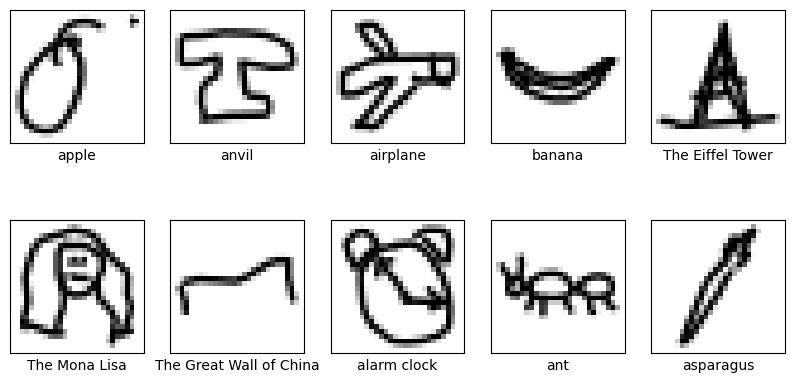

In [26]:
# these are your 10 unique images
plt.figure(figsize=(10,5))
start = 0

for num, name in enumerate(class_names):
    plt.subplot(2,5, num+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[start].reshape(28,28),cmap=plt.cm.binary)
    plt.xlabel(name)
    start += 10000
plt.show()

Say hello to the Quickdraw dataset!

You'll be using this dataset a lot this week as an alternative to the MNIST digits data set, which we'll use in the guided projects. The nice thing about this dataset is that it's simple, which allows us to focus on our model, its various components, and gradually come to a better understanding of how to build neural networks without worrying about cleaning and prepping our image data much.

In [27]:
# always a good idea to shuffle your dataset!
X, y = shuffle(X, y)

-----

## Build Your Baseline Model

Make sure that you

- **Determine** the dimensionality of your input data by investigating **X**
- **Normalize** your input data to values between 0 and 1
- **Determine** the number of neurons in your output layer by investigating **Y**
- **Select** `sparse_categorical_crossentropy` as your loss function.
- **Select** `sgd` as your optimizer.
- **Add** 3 hidden layers to your model with the following number of nodes
    - h1 has 500 nodes
    - h2 has 250 nodes
    - h3 has 100 nodes
    
- **Set** epochs to 20
- **Use** the `validation_split` keyword in `model.fit()` to automatically create a training / validation dataset from within the model. Specify a percentage, such as `validation_split = 0.2`

Not sure what the various parameters are for or what values to assign to them?

- Reference the guided project notebook for Sprint 2 Module 1
- Reference the [**Keras documentation**](https://keras.io/api/)
- Google other examples
- Discuss your results with classmates

In [47]:
# get dim of image row vectors and save to input_dim
input_dim = X.shape[1]

# get number of unique labels and save to n_output_labels
n_output_nodes = len(np.unique(y))

# normalize image data to values between 0 and 1 (by dividing by max pixel value)
max_pixel_value = X.max()
X_scaled = X / max_pixel_value


In [45]:
X_scaled[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [46]:
# a check on your data prep
assert  X_scaled.max(), "Max pixel value should be 1.0, make sure you normalize your data"

In [48]:
# instantiate a sequential object and call it model, then add the layers to your model
# create a neural network by stacking layers. Each layer helps the nn process more.
model = Sequential()

# training rounds (practice rounds helps the nn get smarter by looking at the pictures again and learning from mistakes)
epochs = 20

# thinking layers (dense layers) to process information

model.add(
    # Hidden layer 1: has 500 neurons
    # sigmoid is a switch that decides how much each neuron's idea matters
    # squishes guesses into a range between 0 and 1 (probabilities)
    Dense(500, activation="sigmoid", input_dim=input_dim)
)

model.add(
    # Hidden layer 2
    # takes ideas from first layer and combines them to make smarter guesses
    Dense(250, activation="sigmoid")
)

model.add(
    # Hidden Layer 3
    # takes ideas from second layer and combines them to make smarter guesses
    Dense(100, activation="sigmoid")
)

model.add(
    # output layer
    # makes the decision
    # (number of possible answers, special rule that picks the most likely answer and makes sure all the guesses add up to 100%)
    Dense(n_output_nodes, activation="softmax")
)

# compile layer
# sets up the learning rules (how the model is to learn from its mistakes and get better at guessing)
# sgd is 'Stochastic Gradient Descent', which is the teacher telling the nn how to adjust its guesses when it's wrong
# loss is the score that tells the nn how wrong its guesses are. If the nn guesses wrong, it helps the nn learn to do better
# metrics keeps track of how often the brain guesses the right image
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [49]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 500)            │       392,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 250)            │       125,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        25,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 543,860 (2.07 MB)

 Trainable params: 543,860 (2.07 MB)

 Non-trainable params: 0 (0.00 B)

In [50]:
# a check on your model architecture
n_layers = len(model.get_config()["layers"])
assert n_layers == 5, "You should have 5 layers: input, h1, h2, h3, and output"

In [51]:
# fit your model and save training results to history
history = model.fit(X_scaled, y,
                    epochs=epochs,
                    # a held-out validation set will be generated within the model
                    validation_split=0.2
                   )

Epoch 1/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.1136 - loss: 2.3041 - val_accuracy: 0.3333 - val_loss: 2.2755
Epoch 2/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.2308 - loss: 2.2636 - val_accuracy: 0.3210 - val_loss: 2.1793
Epoch 3/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.3828 - loss: 2.0891 - val_accuracy: 0.4332 - val_loss: 1.7280
Epoch 4/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.4749 - loss: 1.6398 - val_accuracy: 0.5538 - val_loss: 1.4413
Epoch 5/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.5653 - loss: 1.3941 - val_accuracy: 0.6043 - val_loss: 1.2484
Epoch 6/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6265 - loss: 1.2060 - val_accuracy: 0.6611 - val_loss: 1.1061
Epoch 7/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6662 - loss: 1.0841 - val_accuracy: 0.6905 - val_loss: 1.0252
Epoch 8/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6899 - loss: 1.0104 - 

----
### Visualize the Results

- Move results in `history` to a dataframe.
- Use [**Seaborn**](https://seaborn.pydata.org/generated/seaborn.lineplot.html) to create line plots for both loss and accuracy by epoch.
- Analyze the results and write a couple of observations.

At what point should we have stopped training the model and why?

In [62]:
history.history

{'accuracy': [0.12972499430179596,
  0.274150013923645,
  0.40059998631477356,
  0.5019624829292297,
  0.581725001335144,
  0.6365249752998352,
  0.6728249788284302,
  0.69183748960495,
  0.7026625275611877,
  0.7111250162124634,
  0.7179999947547913,
  0.7260375022888184,
  0.731249988079071,
  0.7366874814033508,
  0.7428874969482422,
  0.7488250136375427,
  0.7530624866485596,
  0.7575500011444092,
  0.7623500227928162,
  0.7653999924659729],
 'loss': [2.2939136028289795,
  2.2423770427703857,
  1.9736276865005493,
  1.5696074962615967,
  1.3432111740112305,
  1.173598051071167,
  1.061467170715332,
  1.0032460689544678,
  0.971692681312561,
  0.9485903382301331,
  0.9282125234603882,
  0.908824622631073,
  0.8901190161705017,
  0.8721189498901367,
  0.8547269701957703,
  0.8381511569023132,
  0.8227860331535339,
  0.8087113499641418,
  0.795681357383728,
  0.7836863398551941],
 'val_accuracy': [0.33329999446868896,
  0.32100000977516174,
  0.43320000171661377,
  0.553849995136261,


In [63]:
df = pd.DataFrame.from_records(history.history)
n_rows = df.shape[0]
# shift the index up by one for plotting epochs
df.index = [i for i in range(1, n_rows + 1)]
df.head()

,accuracy,loss,val_accuracy,val_loss
1,0.129725,2.293914,0.33330,2.275475
2,0.274150,2.242377,0.32100,2.179323
3,0.400600,1.973628,0.43320,1.727996
4,0.501962,1.569607,0.55385,1.441334
5,0.581725,1.343211,0.60425,1.248358


In [64]:
# a check on our model training
assert df.shape[0] == 20, "df should have the training results from 20 epochs"

([<matplotlib.axis.XTick at 0x7c05d3f82090>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20')])

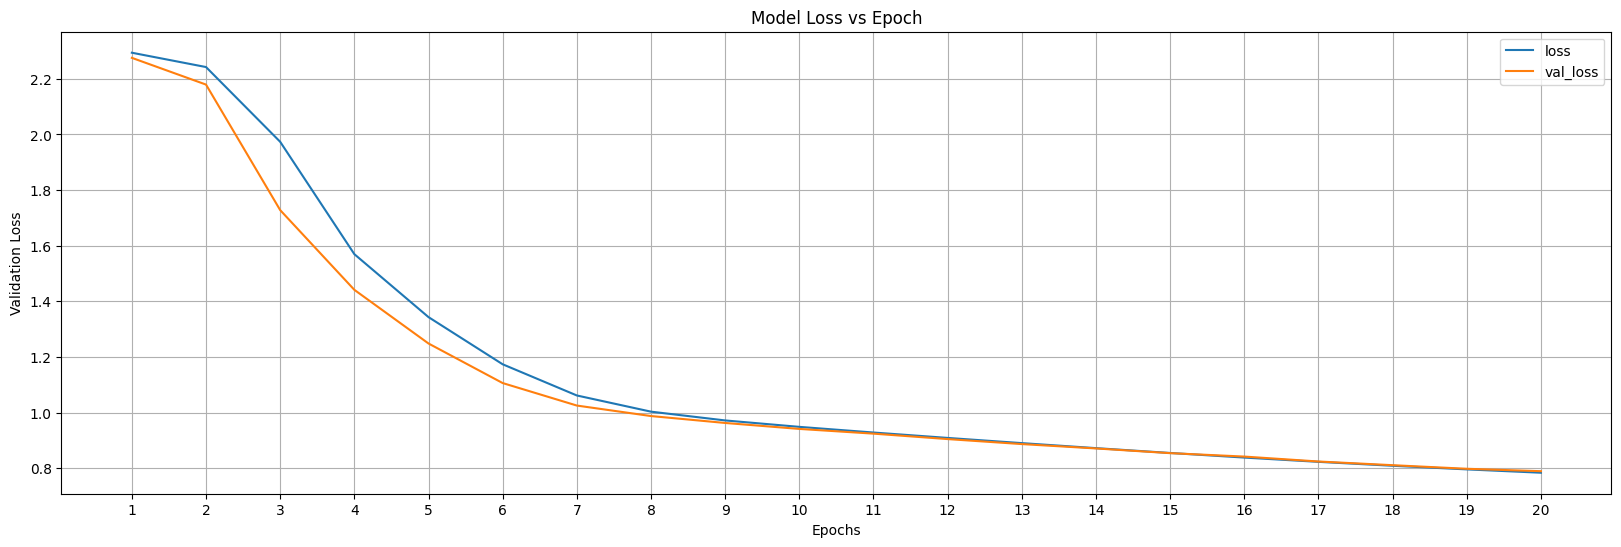

In [66]:
# use seaborn to plot training loss and validation loss metrics
# the blue line is how wrong the model is on its homework (training loss)
# the orange line is how wrong the model is on a test (validation loss)

plot_cols = ["loss", "val_loss"]
df[plot_cols].plot(figsize=(20,6), grid=True)
plt.title("Model Loss vs Epoch")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.xticks(df.index)

### Observations

Based on the plot of the training and validation loss, answer the following questions.

**Was our model able to learn throughout the 20 epochs? Why or why not?**

Yes, the model learned a lot over the course of 20 epochs! This is evidenced by the drop in the loss from about 2.3 during the first epoch down to about 0.8 in the last epoch; meaning the model guessed better.

**Is our model overfitting? Why or why not?**

No, the model is not overfitting! Overfitting is like the model memorizing training answers but forgetting how to take a new test--the blue line would go down, but the orange line would go up or stop. Here, both lines go down together, so the model is learning real patterns, not just memorizing.

**Could the model score benefit from additional epochs? Why or why not?**

Maybe a tiny bit, but probably not much! If you look at the derivative of the curve (the rate of change) near the end of the training, the curve is almost flat. Which means that introducing more epochs would not drop the loss by any significant amount and could start overfitting if you go too long. To further decrease the loss of the model, other options would need to be explored such as using a different activation function or optimizer.

-----
## Change Optimizers

Let's compare model performance between different optimizers.
- Build a new model, identical to the last one but using `adam` for the optimizer.
- Train (fit) the model
- Save the modeling results to adam_history, so we don't erase the results from the previous model run
- Visualize the training results just as we did for the last model.


Differences between SGD and ADAM:

SGD: Takes big steps at a time. Looks at one small piece, not the whole picture. Adjusts path based on information received. It's fast because it doesn't need to think about everything at once. It might miss the best route if the spot picked is tricky.

ADAM: Looks at whole picture and remembers where values are. Takes smaller steps on hard parts and bigger steps on easier parts. Adjusts its step size based on what it's learned. Learns from past steps. Might take longer to start.

SGD uses the same step size every time. ADAM changes its step size. SGD is simple and guesses and tries again. ADAM learns from its mistakes and gets better at picking the right steps.

In [67]:
# train the same model as above but use the sgd optimizer if you used adam previously (or use adam if you used sgd previously)

# instantiate a sequential object and call it model, then add the layers to your model
# create a neural network by stacking layers. Each layer helps the nn process more.
model = Sequential()

# training rounds (practice rounds helps the nn get smarter by looking at the pictures again and learning from mistakes)
epochs = 20

# thinking layers (dense layers) to process information

model.add(
    # Hidden layer 1: has 500 neurons
    # sigmoid is a switch that decides how much each neuron's idea matters
    # squishes guesses into a range between 0 and 1 (probabilities)
    Dense(500, activation="sigmoid", input_dim=input_dim)
)

model.add(
    # Hidden layer 2
    # takes ideas from first layer and combines them to make smarter guesses
    Dense(250, activation="sigmoid")
)

model.add(
    # Hidden Layer 3
    # takes ideas from second layer and combines them to make smarter guesses
    Dense(100, activation="sigmoid")
)

model.add(
    # output layer
    # makes the decision
    # (number of possible answers, special rule that picks the most likely answer and makes sure all the guesses add up to 100%)
    Dense(n_output_nodes, activation="softmax")
)

# compile layer
# sets up the learning rules (how the model is to learn from its mistakes and get better at guessing)
# adam is 'Adaptive Gradient Descent', which is the teacher telling the nn how to adjust its guesses when it's wrong
# loss is the score that tells the nn how wrong its guesses are. If the nn guesses wrong, it helps the nn learn to do better
# metrics keeps track of how often the brain guesses the right image
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# fit your model and save training results to adam history
adam_history = model.fit(X_scaled, y,
                    epochs=epochs,
                    # a held-out validation set will be generated within the model
                    validation_split=0.2
                   )

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.6796 - loss: 1.0063 - val_accuracy: 0.8324 - val_loss: 0.5572
Epoch 2/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8460 - loss: 0.5053 - val_accuracy: 0.8536 - val_loss: 0.4905
Epoch 3/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8719 - loss: 0.4132 - val_accuracy: 0.8624 - val_loss: 0.4547
Epoch 4/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8929 - loss: 0.3528 - val_accuracy: 0.8664 - val_loss: 0.4469
Epoch 5/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9071 - loss: 0.3067 - val_accuracy: 0.8758 - val_loss: 0.4237
Epoch 6/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9195 - loss: 0.2667 - val_accuracy: 0.8777 - val_loss: 0.4213
Epoch 7/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9281 - loss: 0.2374 - val_accuracy: 0.8755 - val_loss: 0.4464
Epoch 8/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9392 - loss: 0.2012 - 

In [71]:
model.get_config()

{'name': 'sequential_1',
 'trainable': True,
 'dtype': {'module': 'keras',
  'class_name': 'DTypePolicy',
  'config': {'name': 'float32'},
  'registered_name': None},
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'input_layer_1'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'dense_4',
    'trainable': True,
    'dtype': {'module': 'keras',
     'class_name': 'DTypePolicy',
     'config': {'name': 'float32'},
     'registered_name': None},
    'units': 500,
    'activation': 'sigmoid',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Zeros',
     'config': {},
     'registered_name

In [69]:
# a check that we're using the correct optimizer in this model
opt_name = model.optimizer.get_config()["name"]
assert opt_name == "adam", "you need to use adam for the optimizer in this model."

In [74]:
adam_history.history

{'accuracy': [0.7707250118255615,
  0.8488625288009644,
  0.8730124831199646,
  0.8909000158309937,
  0.9052000045776367,
  0.9182375073432922,
  0.9272124767303467,
  0.9366875290870667,
  0.9458249807357788,
  0.9529374837875366,
  0.9584624767303467,
  0.9637374877929688,
  0.9678624868392944,
  0.9719125032424927,
  0.9742500185966492,
  0.9781625270843506,
  0.9791125059127808,
  0.9801750183105469,
  0.9834250211715698,
  0.9837625026702881],
 'loss': [0.742451012134552,
  0.49406659603118896,
  0.41351616382598877,
  0.3589169681072235,
  0.3125326931476593,
  0.2726200222969055,
  0.2392502725124359,
  0.20931792259216309,
  0.18129678070545197,
  0.1574670821428299,
  0.13929776847362518,
  0.12081916630268097,
  0.10690011084079742,
  0.095100037753582,
  0.08478983491659164,
  0.07303062826395035,
  0.06797879189252853,
  0.06315331161022186,
  0.05432652682065964,
  0.05252383276820183],
 'val_accuracy': [0.8324000239372253,
  0.853600025177002,
  0.8623999953269958,
  0.86

In [75]:
df_adam = pd.DataFrame.from_records(adam_history.history)
n_rows = df_adam.shape[0]
# shift the index up by one for plotting epochs
df_adam.index = [i for i in range(1, n_rows + 1)]
df_adam.head()

,accuracy,loss,val_accuracy,val_loss
1,0.770725,0.742451,0.83240,0.557187
2,0.848863,0.494067,0.85360,0.490504
3,0.873012,0.413516,0.86240,0.454734
4,0.890900,0.358917,0.86640,0.446947
5,0.905200,0.312533,0.87575,0.423688


([<matplotlib.axis.XTick at 0x7c05c09d5eb0>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20')])

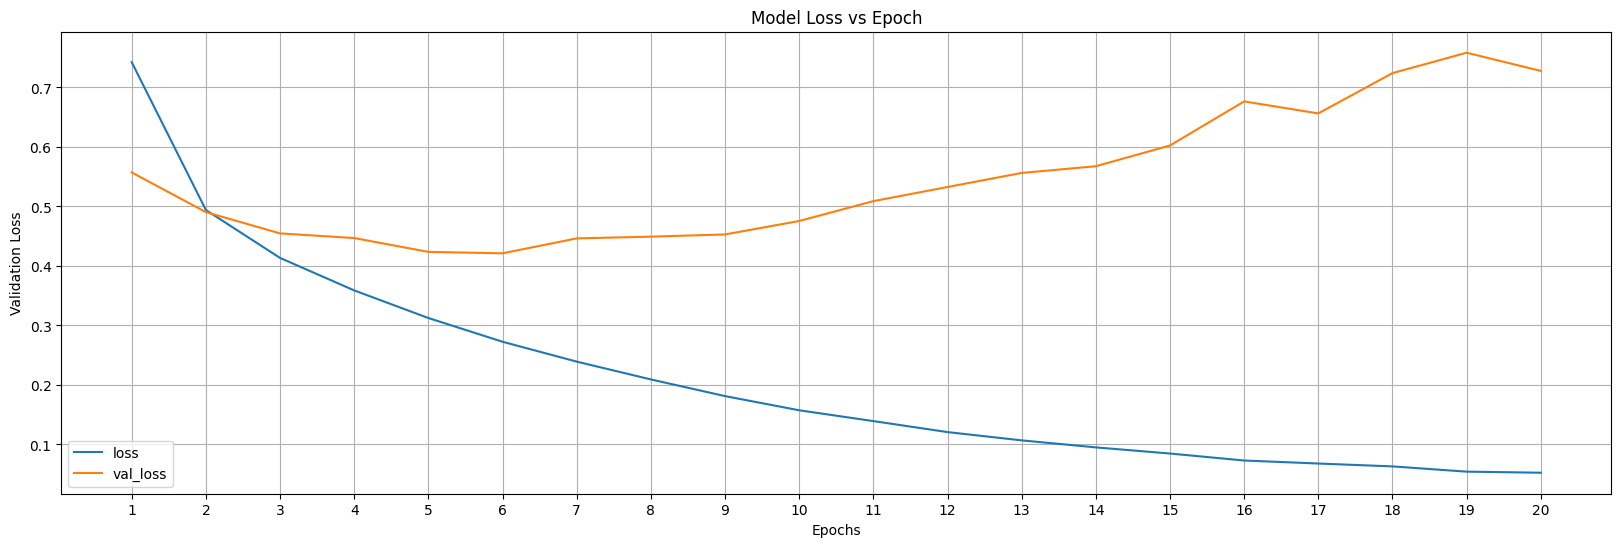

In [76]:
# use seaborn to plot training loss and validation loss metrics
# the blue line is how wrong the model is on its homework (training loss)
# the orange line is how wrong the model is on a test (validation loss)

plot_cols = ["loss", "val_loss"]
df_adam[plot_cols].plot(figsize=(20,6), grid=True)
plt.title("Model Loss vs Epoch")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.xticks(df_adam.index)

### Observations

This plot should look very different from the previous plot. Based on the plot of the training and validation loss, answer the following questions.

**Is our model overfitting? Why or why not?**

Yes, this model with the 'adam' optimizer is definitely overfitting as evidenced by the validation loss curve going up while the traing loss curve goes down. The model memorized patterns instead of learning real patterns.

**Could our model's performance improve by training on more than 20 epochs? Why or why not?**

No. Increasing the number of epochs beyond 20 will most likely increase the validation loss and thus, overfitting.

**Assuming that you want to stick to this model architecture, what can you do to avoid overfitting?**

Cut off the training around 3 epochs, where the validation loss is lower than the lowest loss in the SGD model and where the Adam model has the least overfitting as indicated in the plot.

------
# Conclusion

You have observed by comparing the two models that are identical except for the optimizer, that the choice of the optimizer can considerably influence the performance of a neural network.

You might not know

- why changing the optimizer from Stochastic Gradient Descent over to Adam made a difference.
- how Gradient Descent works
- or that Adam is known as Adaptive Gradient Descent (i.e., is it a different version of ordinary Gradient Descent).

But that's ok - tomorrow's lesson will be a deep dive into Gradient Descent. You'll learn the theory of Gradient Descent, we'll code up Gradient Descent from scratch, and we'll talk about how Adam is different from ordinary Gradient Descent.

-----
# Preparation for Tomorrow

In preparation for tomorrow, you might need to watch a few videos. I say it might because you may or may not already be comfortable with multi-variate calculus.

### Theory of Calculus
The theory of Gradient Descent rests on [**the derivative from Calculus**](https://www.youtube.com/watch?v=WUvTyaaNkzM). If you've never taken a Calculus course before, or are a bit rusty, definitely watch this video in preparation for tomorrow's lesson. The takeaway here is to understand the derivative conceptually; you won't be asked to calculate any derivatives by hand.

### The Gradient - a Multi-Dimensional Derivative
Once you've watched the previous video, you will be ready to understand how to conceptualize a derivative in an N-dimensional space (where N is any number ranging from 2, 3, 4, ..., all the way to a very large number of dimensions N ). [**This video visually explains the multi-dimensional derivative called the Gradient visually**](https://www.youtube.com/watch?v=GkB4vW16QHI) - and that's the takeaway. The point of this video is to help you understand the Gradient visually using 3D surfaces. You should also know that the Gradient is made up of partial derivatives, more on this tomorrow.

### Contour Maps
It is very common to visual 3D surfaces as 2D contour maps - and we'll be making a lot of use of contour maps to understand Gradient Descent. Watch this video to [**understand the relationship between 3D surfaces and 2D contour maps.**](https://www.youtube.com/watch?v=acdX4YamDtU)

### The Calculus of Backpropagation

Unlike standard Sklearn ML models, neural networks use Gradient Descent and something called Backpropagatin to learn from the data. [**In order to understand how backpropagation works, you need to understand the Chain Rule in Calculus**](https://www.youtube.com/watch?v=acdX4YamDtU). The takeaway here is to understand how a partial derivative can be decomposed into a product of multiple derivatives.

------
# Stretch Goals

### This Section is Optional!

Only after you've completed the above work and watched the recommended videos are you then encouraged to experiment with building a few more models and analyze their results.

Here are some suggestions to help you get started.

- Train the same model using the Sigmoid and Relu activation functions and note the difference in their learning outcomes. [**Keras docs on activation functions**](https://keras.io/api/layers/activations/). We'll cover the Relu activation function in Sprint 2 Module 3.
- Train the same model using normalized and non-normalized data and note the difference in their learning outcomes.


The objective here is to get more practice with the Keras API (i.e., building models) and run a couple of experiments to help set you up for future lessons. In order words, we'll be discussing different activation functions and the effect of normalized data on model training.